# Netflix dataset analysis Real world Project with python
# #### Introduction

* Netflix is a tv show providing different types of movies to viewers also produces and makes movies
* The following dataset contains all the movies on the netflix database until the 2021 sesson, including the directors, type, description and the rating and countries through which the films were filmed, a selected group of cast is included



* The data is a csv file and analysis is done using pandas 

* The data will be saved and exported to power bi for good visualisations

* matplotlib will be used for some data visualisations to get the inisghts of the data

#### Questions to answer

These Questions will be answered under phase3: of the data analysis 

* '1920' what is show id and who directed the show

* Which month produced were highest number of movies released and plot the visuals

* how many movies and Tv shows that are in the dataset and plot the visuals

* Show all movies released in 2018

* shows all movies title that were released on sunday

* Show top 10 directors who gave highest number of tv shows and movies on netflix

* Show category is movie and type is comedy or country is Brazil

* how many movies/shows was Tom Cruise a Cast

* What are different Ratings of netflix

* How many tv shows got rating R, after year 2019 in Canada
 
* What is the maximum duration of a movie or a show

* How many seasons are in the data set

* Which country has the highest number of tv shows

* Sort the dataset by year

They will help in the story telling of in this data

# PHASE 1: PREPARE 

This step involves data importation from different sources, libraries import and also the general over view of data to be used is given


* the dataset used in this data analysis is collected from fixable which is third part Netflix search engine and its there on Kaggle website for free

In [1]:
import pandas as pd               #for data loading and manipulation
import numpy as np                #for stastical analysis
import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns
import matplotlib
%matplotlib inline 

C:\Users\geeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
na_vals = ['nan', 'NaN', ' ', ' missing', 'Missing', 'naN']     # a list containing all the values to be deemed as null values
df = pd.read_csv(r"C:\Users\geeth\Desktop\DATA ANALYSIS\NETFLIX_data.csv", na_values= na_vals)



#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#on this following method inputting r doesnt matter
#import the in the jupyter notebook folder you wroking on and copy the name of the dataset hence insert it in the parentheses

take a look at the first 3 rows of the dataset

In [4]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


take a look at the last 2 rows of the dataset

In [5]:
df.tail(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


take a look at how many entries are in the dataset

In [6]:
#prinitng the dimensions of the dataframe, (rows, and columns)
df.shape

(7789, 11)

there are 7789 rows and 11 columns

taking a look at the columns of the data


In [7]:
df.columns.to_frame()                        # shows the all the column names of the dataset

,0
Show_Id,Show_Id
Category,Category
Title,Title
Director,Director
Cast,Cast
Country,Country
Release_Date,Release_Date
Rating,Rating
Duration,Duration
Type,Type


take a look at the datatypes of the dataset

In [8]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

from the output release date needed to be changed to timestamp in phase 2 of data cleaning
the same might apply for the rating, duration

# Phase 2: Data Processing


This phase inludes cleaning, transforming and processing data

### step 1: check all the empty rows and columns

In [9]:
df.isnull().sum()                 #this shows all total missing or null values

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

only 4 columns have nan values or missing values, the leading column being Director
Before dropping the rows or columns care should be taken as to weather if the rows can be filled or not, through asking
or through using the mean values, or through using the most values.
The decision made is based upon those factors, from the looks of it some of the rows cannot be filled, hence dropping them is the way

The null values can be visualised using searbon library


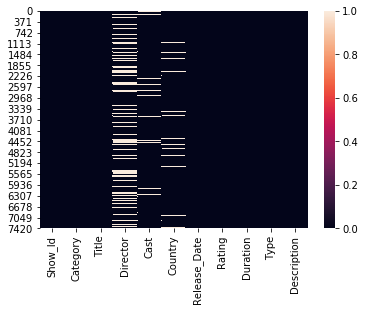

In [10]:
import seaborn as sns
sns.heatmap(df.isnull())

Areas with white gaps shows the nulls values present in the dataset

In [11]:
df.shape

(7789, 11)

number of rows before removing null values

In [12]:
df.dropna(axis='index', how='all', subset=['Director', 'Country', 'Cast'], inplace = True)

#inplace true makes the changes to aplly to the entire dataset
#the axis = 'index' shows that the rows are going to be deleted not columns
#how = 'all' show that all the missing values in the columns mentioned in 
#subset command will be removed according

In [13]:
df.shape

(7731, 11)

number of rows after removing the null values

In [14]:
df.isnull().sum()         #check to see if much change has been done

Show_Id            0
Category           0
Title              0
Director        2330
Cast             660
Country          449
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

drop the null values except the Director column since it will ruin the entire dataset because of its size

In [15]:
df.dropna(axis='index', how='any', subset=['Cast', 'Country', 'Release_Date', 'Rating'], inplace = True)
df.shape

# all null vlaues in columns that are in the subset has been dropped


(6645, 11)

In [16]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        1834
Cast               0
Country            0
Release_Date       0
Rating             0
Duration           0
Type               0
Description        0
dtype: int64

all rows have been cleaned except of the Director column, which is going to be left like that, such that non much data is lost

#### step 2: change the object data type in Release date to timestamp


some changes conversion might happen others might not due to the dataset structure and format

In [17]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])  
df['Release_Date'].dtype

dtype('<M8[ns]')

#### step 2.1: create a seperate column for years, months and day names  

In [18]:
df['Year'] = df['Release_Date'].dt.year
df['Month'] = df['Release_Date'].dt.month
df['Day_of_Week'] = df['Release_Date'].dt.day_name()

take a look at changes in the dataframe

In [19]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Friday
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Friday


In [20]:
df['Year'].value_counts()

2019    1849
2020    1749
2018    1431
2017    1022
2016     371
2021      97
2015      74
2014      21
2011      13
2013      11
2012       3
2009       2
2010       1
2008       1
Name: Year, dtype: int64

#### step 2.2: change the value names of months into actual month names

In [21]:
df['Month'] = df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

#renaming the values of the month into actual months

### step 3: drop the duplicates the dataset

In [22]:
df[df.duplicated()]        #finding out all duplicates values in the dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,2019,Apr,Friday
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,2020,Sep,Friday


In [23]:
df.duplicated().sum()

2

In [24]:
df.drop_duplicates(inplace=True)    #removing duplicates rows in the dataset

# Phase 3: Data Analysis

This phase Analyzes the cleaned data to get more insights of the data, to answer some questions

#### Question one: '1920' what is show id and who directed the show

the question can be answered in 3 ways

In [25]:
#first one

df.head(2)       #first view the first 2 rows

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec,Friday


In [26]:
#use the filtering condition

filt = (df['Title'] == '1920')
df.loc[filt, ['Show_Id', 'Director']]

,Show_Id,Director
9,s10,Vikram Bhatt


the show_id is s10 and the director is Vikram Bhatt

In [27]:
#second one
filt = df['Title'].isin(['1920'])
df.loc[filt, ['Show_Id', 'Director']]   #isin check for the 1920 movie in the title column

,Show_Id,Director
9,s10,Vikram Bhatt


still gives the same answer as the first one

In [28]:
#third one
filt = df['Title'].str.contains('1920')
df.loc[filt, ['Show_Id', 'Director']]           #checks if the title series column contains the 1920 movies with it

,Show_Id,Director
9,s10,Vikram Bhatt


still gives the same answer as the second and the first one

#### Question two: Which month produced were highest number of movies released

this question can be answered 2 in ways

In [29]:
df['Month'].value_counts().sort_values(ascending=False)        #it counts the occurance of all individual months released in the month column

Dec    717
Oct    666
Jan    664
Nov    656
Mar    572
Aug    519
Jul    517
Apr    511
Sep    507
Jun    456
May    450
Feb    408
Name: Month, dtype: int64

december had the highest number of movie released and the last month being in february

In [30]:
df['Release_Date'].dt.month.value_counts()              #it counts the occurance of all individual months release date column

12    717
10    666
1     664
11    656
3     572
8     519
7     517
4     511
9     507
6     456
5     450
2     408
Name: Release_Date, dtype: int64

this method shows the months in figures unlike the first method

show the information on the bar chart

Text(0, 0.5, 'Number of movies released/month')

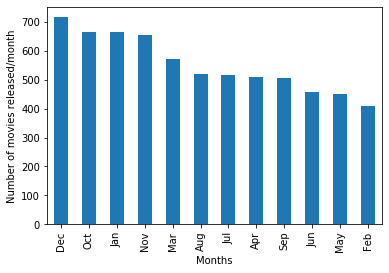

In [31]:
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Number of movies released/month')

##### * **key takeaway:**  more movies were released in december

#### Question 3: how many movies and Tv shows that are in the dataset 
 

this question can be answered in 2 ways

In [32]:
df.head(1)        #take  a look at the first row of the dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday


In [33]:
#use the value_counts() to know different number of movies and tv shows

df['Category'].value_counts()

Movie      4761
TV Show    1882
Name: Category, dtype: int64

Text(0, 0.5, 'Number of movies released')

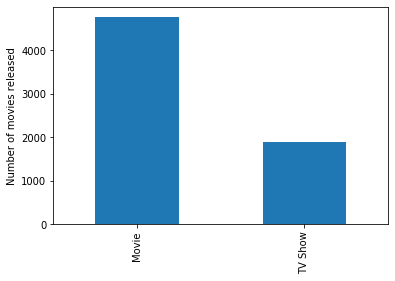

In [34]:
df['Category'].value_counts().plot(kind='bar')
plt.ylabel('Number of movies released')

In [35]:
df.groupby('Category').Category.count()     #groups all unique items and display their counts

Category
Movie      4761
TV Show    1882
Name: Category, dtype: int64

still gives the same answer as the one on top

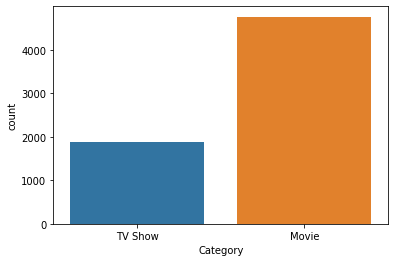

In [36]:
sns.countplot(df['Category'])

##### * **key takeaway:**  more movies were released that the tv shows

#### Question 4: Show all movies released in 2018

In [37]:
filt = (df['Year'] == 2020) & (df['Category'] == 'Movie')
df[filt].shape
print('total movies released are: ', df[filt].shape)

total movies released are:  (1190, 14)


#### Question 5: shows all movies title that were released on sunday

In [38]:
filt = df['Day_of_Week'] == 'Sunday'
df.loc[filt, ['Day_of_Week', 'Title']]

,Day_of_Week,Title
15,Sunday,Oct-01
32,Sunday,#FriendButMarried 2
65,Sunday,13 Sins
75,Sunday,1BR
91,Sunday,26 Years
...,...,...
7725,Sunday,You Can Tutu
7730,Sunday,You Don't Mess with the Zohan
7757,Sunday,Z Nation
7771,Sunday,Zindagi Na Milegi Dobara


#### Question 6: Show top 10 directors who gave highest number of tv shows and movies on netflix

In [39]:
#take a look at the dataset
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday


In [40]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

Raul Campos, Jan Suter lead with a total of 18, number 10 being Robert Rodriguez

#### Question 6: Show category is movie and type is comedy or country is Brazil

In [41]:
filt = ((df['Category'] == 'Movie') & (df['Type'] == 'Comedy')) | (df['Country'] == 'Brazil')
df[filt]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...,2020,Nov,Wednesday
320,s321,Movie,Afonso Padilha: Classless,"Junior Carelli, Rudge Campos",Afonso Padilha,Brazil,2020-09-03,TV-MA,63 min,Stand-Up Comedy,Brazilian comedian Afonso Padilha dives into h...,2020,Sep,Thursday
322,s323,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,2020-10-31,TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...,2020,Oct,Saturday
394,s395,Movie,Alice Junior,Gil Baroni,"Anne Celestino Mota, Emmanuel Rosset, Matheus ...",Brazil,2020-10-23,TV-MA,87 min,"Comedies, International Movies, LGBTQ Movies","In a small town, a trans teen with a vibrant p...",2020,Oct,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,s6656,TV Show,The Mechanism,NaN,"Selton Mello, Caroline Abras, Enrique Diaz, An...",Brazil,2019-05-10,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A scandal erupts in Brazil during an investiga...,2019,May,Friday
7046,s7045,Movie,Thiago Ventura: POKAS,"Fabio Ock, Joana Mazzucchelli",Thiago Ventura,Brazil,2020-07-02,TV-MA,82 min,Stand-Up Comedy,"In a rollicking special, Thiago Ventura jokes ...",2020,Jul,Thursday
7385,s7384,TV Show,Vai Anitta,NaN,Anitta,Brazil,2018-11-16,TV-MA,1 Season,"Docuseries, International TV Shows, Reality TV",Go behind the scenes with Brazilian pop icon A...,2018,Nov,Friday
7592,s7591,Movie,Whindersson Nunes: Adult,Diego Pignataro,Whindersson Nunes,Brazil,2019-08-15,TV-MA,69 min,Stand-Up Comedy,Brazilian YouTube sensation Whindersson Nunes ...,2019,Aug,Thursday


#### Question 7: how many movies/shows was Tom Cruise a Cast

In [42]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020,Jan,Wednesday
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019,Jul,Monday


Tom cruise showed up in 2 movies

#### Question 8: What are different Ratings of netflix

There are 3 ways in which ratings can be achieved

In [43]:
df['Rating'].nunique()

14

In [44]:
df['Rating'].unique()               #list all ratings in the rating column

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'NR',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [45]:
df['Rating'].value_counts()             #list unique ratings in the ratings column with their frequency

TV-MA       2450
TV-14       1636
R            655
TV-PG        627
PG-13        375
PG           238
TV-Y7        208
TV-Y         192
TV-G         146
NR            66
G             38
UR             5
TV-Y7-FV       4
NC-17          3
Name: Rating, dtype: int64

#### Question 9: How many tv shows got rating R, after year 2019 in Canada

In [46]:
filt = (df['Category'] == 'TV Show') & (df['Country'] == 'Canada') & (df['Year'] > 2019) & (df['Rating'] == 'R')
df[filt]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week


There is no such a movie with such qualities because it retained none

#### Question 10: What is the maximum duration of a movie or a show

In [47]:
df['Duration'].unique()                   #shows uniques values in the duration column

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '99 min', '102 min',
       '104 min', '105 min', '125 min', '81 min', '97 min', '106 min',
       '107 min', '109 min', '44 min', '101 min', '90 min', '3 Seasons',
       '113 min', '114 min', '130 min', '94 min', '140 min', '135 min',
       '82 min', '70 min', '92 min', '164 min', '83 min', '116 min',
       '84 min', '86 min', '120 min', '96 min', '126 min', '75 min',
       '129 min', '77 min', '137 min', '148 min', '121 min', '122 min',
       '176 min', '85 min', '22 min', '68 min', '111 min', '29 min',
       '142 min', '168 min', '59 min', '108 min', '26 min', '156 min',
       '98 min', '57 min', '150 min', '133 min', '115 min', '154 min',
       '127 min', '146 min', '136 min', '88 min', '131 min', '24 min',
   

In [48]:
#This cannot be done since its data type is in object
#hence there is need to split mins and quanities in different columns

df[['Total Mins/Seasons', 'Mins/Seasons']] = df['Duration'].str.split(' ', expand=True)       
df.head(2)

#2 new columns are formed that is total mins and mins/season



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week,Total Mins/Seasons,Mins/Seasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec,Friday,93,min



Create a new dataframe and remove all the columns that have season in the mins/seasons column

In [49]:
filt = (df['Mins/Seasons'] == 'Seasons')
df1 = df[~filt]                                 #creates a new dataframe without the number of seasons

In [50]:
df1.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week,Total Mins/Seasons,Mins/Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec,Friday,93,min


change the data type of the total mins/seaons to int

In [51]:
df1['Total Mins/Seasons'] = df1['Total Mins/Seasons'].astype(int)

C:\Users\geeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


check the data type

In [52]:
df1['Total Mins/Seasons'].dtype

dtype('int32')

it has changed to int 32

Now the max, mean, low values of the duration is as follows

In [53]:
df1['Total Mins/Seasons'].describe()

count    5945.000000
mean       81.752061
std        46.998437
min         1.000000
25%        61.000000
50%        94.000000
75%       111.000000
max       312.000000
Name: Total Mins/Seasons, dtype: float64

#### Question 10: How many seasons are in the data set

In [54]:
filt = (df['Mins/Seasons'] == 'min')
df1 = df[~filt]                            #create a new dataset that contains seasons only

In [55]:
df1.shape

(1882, 16)

The dataset has 1882 seaons

#### Question 11: How which season has the highest season and lower seaon

In [56]:
df1.head(1)             #take a look at the dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week,Total Mins/Seasons,Mins/Seasons
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug,Friday,4,Seasons


In [57]:
df1['Total Mins/Seasons'].max()      #total number of highest number of seasons

'9'

In [58]:
df1['Total Mins/Seasons'].min()      # minimum number of seasons

'1'

#### Question 11: Which country has the highest number of tv shows

In [59]:
filt = (df['Category'] == 'TV Show')
df[filt].Country.value_counts().head(10)

United States     575
United Kingdom    168
Japan             153
South Korea       145
Taiwan             68
India              57
Canada             53
Spain              40
Australia          39
France             36
Name: Country, dtype: int64

#### Question 12: Sort the dataset by year

The question can be done in 2 ways

In [60]:
df['Year'].sort_values(ascending = False)     # first method sort the dataset by column year

5564    2021
1426    2021
692     2021
5771    2021
6479    2021
        ... 
232     2011
3840    2010
3248    2009
5766    2009
7115    2008
Name: Year, Length: 6643, dtype: int64

In [61]:
df.sort_values(by = 'Year', ascending = False)    #second method sorting the dataset by year)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Day_of_Week,Total Mins/Seasons,Mins/Seasons
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2021-01-01,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021,Jan,Friday,128,min
1426,s1427,Movie,Cloudy with a Chance of Meatballs,"Phil Lord, Christopher Miller","Bill Hader, Anna Faris, James Caan, Andy Sambe...",United States,2021-01-01,PG,90 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When inventor Flint Lockwood makes clouds rain...,2021,Jan,Friday,90,min
692,s693,Movie,Bad Grandpa .5,Jeff Tremaine,"Johnny Knoxville, Jackson Nicoll, Greg Harris,...",United States,2021-01-01,TV-MA,87 min,Comedies,The geriatric antics of Irving Zisman continue...,2021,Jan,Friday,87,min
5771,s5771,Movie,Spring Breakers,Harmony Korine,"James Franco, Vanessa Hudgens, Selena Gomez, A...","United States, France",2021-01-10,R,94 min,"Comedies, Cult Movies, Dramas",Four cash-strapped college women run afoul of ...,2021,Jan,Sunday,94,min
6479,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2021,Jan,Friday,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,Oct,Saturday,95,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,Nov,Monday,84,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,May,Tuesday,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,Nov,Wednesday,29,min


# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### Number of movies released/Month

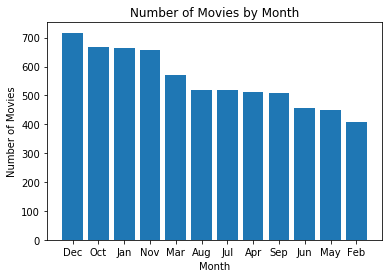

In [62]:

# create a new variable
month_counts = df['Month'].value_counts().sort_values(ascending=False)

# create a bar plot
plt.bar(month_counts.index, month_counts.values)

# set the title and axis labels
plt.title('Number of Movies by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

# display the plot
plt.show()


##### * **key takeaway:**  more series were released in December the least being february

### Category of movies released distribution

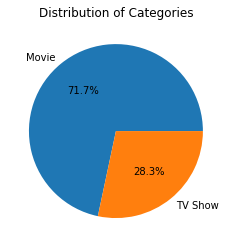

In [63]:


# create a variable for the df[category]
category_counts = df['Category'].value_counts()

# create a pie chart
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Distribution of Categories')

# display the plot
plt.show()


##### * **key takeaway:**  More movies released fall under the Movie dataset 

### Top 10 directors that released more movies

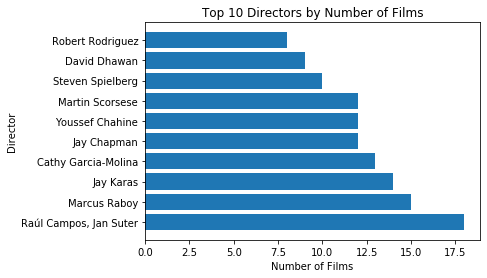

In [64]:

# creating a new data framce for the df['director']
director_counts = df['Director'].value_counts().head(10)

# create a horizontal bar chart
plt.barh(director_counts.index, director_counts.values)

# set the title and axis labels
plt.title('Top 10 Directors by Number of Films')
plt.xlabel('Number of Films')
plt.ylabel('Director')

# display the plot
plt.show()


##### * **key takeaway:**  Raul Campos, Jan Suter had more movies released, as robert Rodriques sealed the top 10

### Movie released in top 5 countries

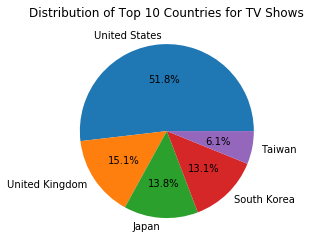

In [65]:


# assuming df is your pandas DataFrame
filt = (df['Category'] == 'TV Show')
tv_country_counts = df[filt].Country.value_counts().head(5)

# create a pie chart
plt.pie(tv_country_counts.values, labels=tv_country_counts.index, autopct='%1.1f%%')

# set the title
plt.title('Distribution of Top 10 Countries for TV Shows')

# display the plot
plt.show()
